# Estimators as Statistical Decision Functions


**Date: November 2016**



In this notebook we discuss some key concepts of statistical decision theory in order to provide a general framework for the comparison of alternative estimators based on their finite sample performance. 
 
 * The primitive object is a statistical decision problem containing a loss function, an action space, and a set of assumed statistical models. We demonstrate that most estimation problems familiar from econometrics can be formulated as a statistical decision problem.
 
 * We compare estimators based on their (finite sample) risk, where risk is derived from an unknown true data generating mechanism.
 
 * We present some straightforward examples to illustrate the main ideas.
 

### TO DO: Add Notations



In [4]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# For coin tossing
from ipywidgets import interact, FloatSlider

# For linear regression
from scipy.stats import multivariate_normal
from scipy.integrate import dblquad

# Shut down warnings for nicer output
import warnings
warnings.filterwarnings('ignore')

# Introduction

**TO DO: add links to QE lectures (ensemble, ergodicity, LLN)**

#### Stationarity and statistical models 

The observed data are modelled as a partial realization of a stochastic process $\{Z_t\}_{t\in\mathbb{Z}}$ taking values in $\mathbb{R}^{k}$. Denote a particular realization as the sequence $z^{\infty} \in \mathbb{R}^{k\mathbb{Z}}$ and let the partial history $z^{n}$ containing $n$ consecutive elements of the realization be the *sample* of size $n$. We assume that there exists a core mechanism undelying this process that describes the relationships among the elements of the vector $Z$. Our aim is to draw inference about this mechanism after observing a single partial realization $z^{n}$. 

How is this possible without being able to draw different samples under the exact same conditions? A fruitful approach is to assume that the underlying mechanism is time invariant with the stochastic process being strictly stationary and study its statistical properties by taking long-run time averages of the realization $z^{\infty}$ (or functions thereof) like
$$\lim_{n\to \infty}\frac{1}{n}\sum_{t = 1}^{n} z_t\quad\quad \lim_{n\to \infty}\frac{1}{n} \sum_{t = 1}^{n} z^2_t\quad\quad \lim_{n\to \infty}\frac{1}{n}\sum_{t = k}^{n+k} z_{t}z_{t-k}$$
Since the mechanism is assumed to be stable over time, it does not matter when we start observing the process.

Notice, however, that strictly speaking these time averages are properties of the particular realization, the extent to which they can be generalized to the mechanism itself is not obvious. To address this question, it is illuminating to bundle realizations that share certain statistical properties together in order to construct an artificial universe of (counterfactual) alternative $z^{\infty}$-s, the so called *ensemble*. Statistical properties of the data generating mechanism can be summarized by assigning probabilities to (sets of) these $z^{\infty}$-s in an internally consistent manner. These considerations lead us to the idea of a statistical model. 

**Statistical models** are probability distributions over sequences $z^{\infty}$ that assign probabilities so that the unconditional moments are consistent with the associated long-run time averages. In other words, with statistical models the time series and ensemble averages coincide, which is the property known as **ergodicity**. Roughly speaking, ergodicity allows us to learn about the ensemble dimension by using a *single* realization $z^{\infty}$.  


#### Dependence

In reality, however, being endowed only with a partial history of $z^{\infty}$, we cannot calculate the exact log-run time averages. Nonetheless, by imposing more structure on the problem and having a sufficinetly large sample, we can obtain reasonable approximations. To this end, we need to assume some form of weak independence ("mixing"), or more precisely, the property that on average, the dependence between the elements of $\{Z_t\}_{t\in\mathbb{Z}}$ dies out as we increase the gap between them. 

Consequently, if we see a *long* segment of $z^{\infty}$ and cut it up into shorter consecutive pieces, say of length $l$, then, we might consider these pieces (provided that $l$ is "large enough") as nearly independent records from the distribution of the $l$-block. To clarify this point, consider a statistical model $Q_{Z^{\infty}}$ (joint distribution over sequences $z^{\infty}$) with density function $q_{z^{\infty}}$ and denote the implied density of the sample as $q_{n}$. Note that because of strict stationarity, it is enough to use the number of consecutive elements as indices. Under quite general conditions we can decompose this density as

$$q_{n}(z^n) = q_{n-1}(z_n | z^{n-1})q_{n-1}(z^{n-1}) = q_{n-1}(z_n | z^{n-1})q_{n-2}(z_{n-1}|z^{n-2})\dots q_{1}(z_{2}|z_1)q_{1}(z_1)$$

For simplicity, we assume that the stochastic process is Markov so that the partial histories $z^{i}$ for $i=1,\dots, n-1$ in the conditioning sets can be replaced by the "right" number of lags $z^{n-1}_{n-l}$ and we can drop the subindex from the conditional densties

$$q_{n}(z^n) = q(z_n | z^{n-1}_{n-1-l})q(z_{n-1}|z^{n-2}_{n-2-l})\dots q(z_{l+1}|z_{1}^{l})q_{l}(z^l) \quad\quad (1)$$

This assumption is much stronger than what we really need. First, it is enough to require the existence of a history-dependent latent state similar to the Kalman filter (!!link!!). Moreover, we could also relax the Markov assumption and allow for dependence that dies out only asymptotically. In practice, however, we often have a stong view about the dependency structure, or at least we are willing to use economic theory to guide our choice of $l$, in which cases we almost always assume a Markovian structure. For simplicity, in these lectures, unless otherwise stated, we will restrict ourselves to the family of Markov processes. 

This assumption allows us to learn about the underlying mechanism $Q_{Z^{\infty}}$ via its $l+1$-period building blocks. Once we determine the (ensemble) distribution of the block, $Q_{Z^{[l+1]}}$, we can "build up" $Q_{Z^{\infty}}$ by using a formula similar to (1). Having said that the block distribution $Q_{Z^{[l+1]}}$ carries the same information as $Q_{Z^{\infty}}$. Therefore, from now on, we define $Z$ as the minimal block we need to know and treat it as an observation. Statistical models can be represented by their prediction about the ensemble distribution $P$ of this observable. 

#### True data generating mechanism

We assume that the mechanism underlying $\{Z_t\}_{t\in\mathbb{Z}}$ can be represented with a statistical model $P_0$ and it is called *true data generating process*. We seek to learn about the features of this model from the observed data.


## Primitives of the problem

Every statistical decision problem that we will consider can be represented with a triple $(\mathcal{H}, \mathcal{A}, L)$, where

1. **Assumed statistical models**, $\mathcal{H}\subset \mathcal{P}$
    >  A collection of statistical models (ergodic probability measures) over the observed data, which captures our *assumptions* about the data generating mechanism underlying $\{Z_t\}_{t\in\mathbb{Z}}$. Ergodicity implies that with infinite data we could single out one element from $\mathcal{H}$.  

2. **Action space**, $\mathcal{A}$
    > The set of allowable actions. It is an abstract set embodying our proposed *specification* by which we aim to capture features of the true data generating mechanism.  

3. **Loss function** $L: \mathcal{P}\times \mathcal{A} \mapsto \mathbb{R}_+$
    > The loss function measures the performance of alternative actions $a\in \mathcal{A}$ under a given distribution $P\in \mathcal{P}$, where $\mathcal{P}$ denotes the space of strictly stationary probability distributions over the observed data. In principle, $L$ measures the distance between distributions in $\mathcal{P}$ along particular dimensions determined by features of the data generating mechanism that we are interested in. By assigning zero distance to models that share a particular set of features (e.g. conditional expectation, set of moments, etc.), the loss function can 'determine' the domain of effective actions.         

Given the assumed statistical models, we can restrict the domain of the loss function without loss in generality such that, $L:  \mathcal{H}\times\mathcal{A} \mapsto \mathbb{R}_+$.

-----------------------------------

### Examples

**Quadratic loss:** 

The most commonly used loss function is the quadratic 
$$L(P, a) = \int (z - a)^2\mathrm{d}P(z)$$
where the action space is $\mathcal{A}\subseteq \mathbb{R}^{k}$. Another important case is when we can write $Z = (Y, X)$, the loss function is 
$$L(P, a) = \int (y - a(x))^2\mathrm{d}P(y, z)$$
and the action space $\mathcal{A}$ contains some well behaving real functions of $X$.  

**Relative entropy loss:**

When we specificy a whole distribution and are willing to approximate $P$, one useful measure for comparison of distributions is the Kullback-Leibler divergence, or relative entropy
$$L(P, a) = - \int \log \frac{p}{a}(z) \mathrm{d}P(z)$$
in which case the action space is $\mathcal{A} = \{a: Z \mapsto \mathbb{R}_+ : \int a(z)\mathrm{d}z =  1 \}$.

**Generalized Method of Moments:**

Following the exposition of Manski (1994), many econometric problems can be cast as solving $T(P, \theta) = \mathbf{0}$ in the parameter $\theta$, for a given function $T: \mathcal{P}\times\Theta \mapsto \mathbb{R}^m$ with $\Theta\subseteq\mathbb{R}^p$. By expressing estimation problems in terms of unconditional moment restrictions, for example, we can write $T(P, \theta) = \int g(z; \theta)\mathrm{d}P(z) = \mathbf{0}$ for some function $g$. Taking an *origin-preserving continuous transformation* $r:\mathbb{R}^m \mapsto \mathbb{R}_+$ so that 
$$T(P, \theta) = \mathbf{0} \iff r(T)=0$$ 
we can present the problem in terms of minimizing a particular loss function. Define the action space as $\mathcal{A} = \Theta$, then the method of moment estimator minimizes the loss $L(P, \theta) = r\circ T(P, \theta)$. The most common form of $L$ is 
$$L(P, \theta) = \left[\int g(z; \theta)\mathrm{d}P(z)\right]' W \left[\int g(z; \theta)\mathrm{d}P(z)\right]$$ where $W$ is a $m\times m$ positive-definite weighting matrix.

----------------------------------------------

### Best in-class action

By using a loss function, we acknowledge that learning about the true mechanism might be too ambitious, so we better focus our attention only on certain features of it and try to approximate those with our specification. The loss function expresses our assessment about which features are important and how deviations from the true features are being punished. With a specified triple we can define **best in-class action** as

\begin{equation}
a^*_{L,\ P,\ \mathcal{A}} := \arg\min_{a \in \mathcal{A}} L(P,a).
\end{equation}


### Features

Often, we denote by $\gamma(P)$, the "feature" of distribution $P$ that we are interested in estimating. We find it useful to make the connection between the feature and the loss function. In particular, the minimizer of the loss function on the broadest possible domain determines the "true" feature, $\gamma(P)$. When the action space $\mathcal{A}$ is restricted, however, this feature might differ from the best-in class action $a^*_{L,\ P, \mathcal{A}}$ defined above. We can summarize this scenario compactly with $\gamma(P)\notin \mathcal{A}$ and saying that the "specification" $\mathcal{A}$ is misspecified. In such cases the loss function plays a critical role by specifying the punishments for deviations from the true $\gamma(P)$. We will talk more about misspecification in the following sections. A couple of examples should help clarifying the introduced concepts.

* **Conditional expectation -- regression function estimation**
> Consider the quadratic loss function over the domain of all square integrable functions $a: X \to \mathbb{R}$, where $Z = (Y, X)$ and $Y$ is a scalar. The corresponding feature is
\begin{equation}
\gamma(P) = \arg\min_{a \in L^2(X)} \int\limits_{(Y,X)} (y - a(x))^2\mathrm{d}P(y, x)
\end{equation}
and it is equal to the conditional expectation $\gamma(P) = \mathbb{E}[Y|X]$. If the action space $\mathcal{A}$ does not include all square integrable functions, but only the set of affine functions, the best in class action, i.e., the linear projection of $Y$ to the space spanned by $X$, will be different from $\gamma(P)$ in general. In other words, the linear specification for the conditional expectation $Y|X$ is misspecified.

* **Density function estimation** 
> Consider the Kullback-Leibler distance over the set of distributions with existing density functions. Denote this set by $D_Z$. Given that the true $P\in D_Z$, the corresponding feature is
\begin{equation}
\gamma(P) = \arg\min_{a \in D_Z} \int\limits_{Z}\log\left(\frac{p(z)}{a(z)}\right) \mathrm{d}P(z)
\end{equation}
which provides the density $p\in\mathbb{R}_+^Z$ such that $\int p(z)\mathrm{d}z =1$ and for any sensible set $B\subseteq \mathbb{R}^k$, $\int_B p(z)\mathrm{d}z = P(B)$. If the action space $\mathcal{A}$ is only a parametric subset of $D_Z$, the best in class action will be the best approximation in terms of KLIC. For an extensive treatment see White (1994).


An important aspect of the statistical decision problem is the relationship between $\mathcal{H}$ and $\mathcal{A}$. Our *maintained assumptions* about the mechanism are embodied in $\mathcal{H}$, so a natural attitude is to be as agnostic as possible about $\mathcal{H}$ in order to avoid incredible assumptions. Once we determined $\mathcal{H}$, the next step is to choose the specification, that is the action space $\mathcal{A}$.

- One approach is to tie $\mathcal{H}$ and $\mathcal{A}$ together. For example, the assumptions of the standard linear regression model outline the distributions contained in $\mathcal{H}$ (normal with zero mean and homoscedasticity), for which the natural action space is the space of affine functions. 
 
- On the other hand, many approaches explicitly disentangle $\mathcal{A}$ from $\mathcal{H}$ and try to be agnostic about the maintained assumptions $\mathcal{H}$ and rather impose restrictions on the action space $\mathcal{A}$. At the cost of giving up some potentially undominated actions this approach can largely influence the success of the inference problem in finite samples. 

By choosing an action space not "tied" to the set of assumed statistical models, the statistician inherently introduces a possibility of bias -- for some statistical models there could be an action outside of the action space which would fare better than any other action within $\mathcal{A}$. However, coarsening the action space in this manner has the benefit of constraining the variability of estimated actions arising from the randomness of the sample.

In this case, the best-in class action has a special role, namely, it minimizes the "distance" between $\mathcal{A}$  and the true statistical model, thus measuring the benchmark bias stemming from restricting $\mathcal{A}$.

## Example - Coin tossing

The observable is a binary variable $Z\in\{0, 1\}$ generated by some statistical model. One might approach this problem by using the following triple

* *Assumed statistical models, $\mathcal{H}$:*
> * $Z$ is generated by an i.i.d. Bernoulli distribution, i.e. $\mathcal{H} = \{P(z; \theta): \theta \in[0,1]\}$
> * The probability mass function associated with the distribution $P(z;\theta)\in\mathcal{H}$ has the form

 $$p(z; \theta) = \theta^z(1-\theta)^{1-z}$$

* *Action space, $\mathcal{A}$:* 
> * Let the action space be equal to $\mathcal{H}$, that is $\mathcal{A} = \{P(z, a): a\in[0,1]\} = \mathcal{H}$.

* *Loss function, $L$*: We entertain two alternative loss functions 
> * Relative entropy
\begin{equation}
L_{RE}(P, a) = \sum_{z\in\{0,1\}} p(z;  \theta)\log \frac{p(z; \theta)}{p(z; a)} = E_{\theta}[\log p(z; \theta)] - E_{\theta}[\log p(z; a)]
\end{equation}
> * Quadratic loss
\begin{equation}
L_{MSE}(P, a) = \sum_{z\in\{0,1\}} p(z;  \theta)(\theta - a)^2 = E_{\theta}[(\theta - a)^2]
\end{equation}


## Example - Linear regression function

In the basic setup of regression function estimation we write $Z=(Y,X)\in\mathbb{R}^2$ and the objective is to predict the value of $Y$ as a function of $X$ using the quadratic loss function. Let $\mathcal{F}:= \{f:X \mapsto Y\}$ be the family of all functions mapping from $X$ to $Y$. The following is an example for a triple

* *Assumed statistical models, $\mathcal{H}$*

> * $(Y,X)$ is generated by an i.i.d. joint Normal distribution, $\mathcal{N}(\mu, \Sigma)$, implying that the true regression function, i.e. conditional expectation, is going to be affine

* *Action space, $\mathcal{A}$*

> * The action space is the set of affine functions over $X$, i.e.  $\mathcal{A}:= \{a \in \mathcal{F} : a(x) = \beta_0 + \beta_1\cdot x\}$


* *Loss function, $L$*

> * Quadratic loss function
\begin{equation}
L(P, f) = \int\limits_{(Y,X)}(y - f(x))^2\mathrm{d}P(y,x)
\end{equation}


# Statistical Decision Functions

As stated before, for each potential statistical model we choose the optimal best in-class action where optimality is gauged by the loss function. 

\begin{equation}
a^*_{L, P, \mathcal{A}} = \arg\min_{a\in\mathcal{A}}L(P,a).
\end{equation}

If one knows the data generating process, there is no need for statistical inference. What makes the problem statistical is that the distribution $P$ describing the environment is not known. The statistician can only base her action on the available data, which is a realization of the underlying data generating mechanism. The time invariant stochastic relationship between the data and the environment allows the decision maker to carry out statistical inference regarding the data generating process.

A statistical **decision rule** then is a function mapping samples (of different sizes) to actions from $\mathcal{A}$. In order to flexibly talk about the behavior of decision rules as the sample size grows, we define the domain of the decision rule to be the set of samples of all potential sample sizes, $\mathcal{S}:= \bigcup_{n\geq1}Z^n$. The decision rule is defined as a sequence of functions

\begin{equation}
d:\mathcal{S} \mapsto \mathcal{A} \quad \quad \text{that is} \quad \quad \{d(z^n)\}_{n\geq 1}\subseteq \mathcal{A},\quad \forall z^{\infty}
\end{equation}


### Example (cont) - estimator for coin tossing

One common way to find a decision rule is to plug the empirical distribution $P_{n}$ into the loss function $L(P, a)$ to obtain 

$$L_{RE}\left(P_{n}; a\right) = \frac{1}{n}\sum_{i = 1}^{n} \log \frac{p(z_i; \theta)}{p(z_i; a)}\quad\quad\text{and}\quad\quad L_{MSE}\left(P_{n}; a\right) = \frac{1}{n}\sum_{i = 1}^{n} (z_i -a)^2$$ 

and to look for an action that minimizes this sample analog. In case of relative entropy loss, it is

$$d(z^n) := \arg \min_{a} L(P_{n}, a) = \arg\max_{a} \frac{1}{n}\sum_{i=1}^{n} \log f(z_i ,a) = \arg\max_{a}  \frac{1}{n}\underbrace{\left(\sum_{i=1}^{n} z_i\right)}_{:= y}\log a + \left(\frac{n-y}{n}\right)\log(1-a) $$
where we define the random variable $Y_n := \sum_{i = 1}^{n} Z_i$ as the number of $1$s in the sample of size $n$, with $y$ denoting a particular realization. The solution of the above problem is the *maximum likelihood estimator* taking the following form

$$\hat{a}(z^n) = \frac{1}{n}\sum_{i=1}^{n} z_i = \frac{y}{n}$$

and hence the **maximum likelihood** decision rule is

$$d_{mle}(z^n) = P(z, \hat{a}(z^n))$$

It is straightforward to see that if we used the quadratic loss instead of relative entropy, the decision rule would be identical to $d_{mle}(z^n)$. Nonetheless, the two loss funcions can lead to very different assessment of the decision rule as will be shown below.  

----------------

For comparison, we consider another decision rule, a particular Bayes estimator (posterior mean), which takes the following form

$$d_{bayes}(z^n) = P(z, \hat{a}_B(z^n))\quad\quad\text{where}\quad\quad \hat{a}_B(z^n) = \frac{\sum^{n}_{i=1} z_i + \alpha}{n + \alpha + \beta} = \frac{y + \alpha}{n + \alpha + \beta}$$

where $\alpha, \beta > 0$ are given parameters of the Beta prior. Later, we will see how one can derive such estimators. What is important for us now is that this is an alternative decision rule arising from the same triple $(\mathcal{H}, \mathcal{A}, L_{MSE})$ as the maximum likelihood estimator, with possibly different statistical properties.  

### Example (cont) - estimator for linear regression function

In this case the approach that we used to derive the maximum likelihood estimator in the coin tossing example leads to the following sample analog objective function
\begin{equation}
d_{OLS}(z^n):= \arg\min_{a \in \mathcal{A}}L(P_{n},a) = \arg\min_{\beta_0, \ \beta_1} \sum_{t=1}^n (y_t - \beta_0 - \beta_1\cdot x_t)^2
\end{equation}

With a bit of an abuse of notation redefine $X$ to include the constant for the intercept, i.e. $\mathbf{X} = (\mathbf{1}, x^n)$. Then the solution for the vector of coefficients, $\mathbf{\beta}=(\beta_0, \beta_1)$, in the ordinary least squares regression is given by

\begin{equation}
\hat{\mathbf{\beta}}_{OLS} := (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{Y}
\end{equation}

Hence, after sample $z^n$, the decision rule predicts $y$ as an affine function given by $d_{OLS}(z^n) = \hat{a}_{OLS}$ such that

\begin{equation}
\hat{a}_{OLS}(x) := \langle \mathbf{\hat{\beta}}_{OLS}, (1, x) \rangle.
\end{equation}

----------------

Again, for comparison we consider a Bayesian decision rule where the conditional prior distribution of $\beta$ is distributed as $\beta|\sigma \sim \mathcal{N}(\mu_b, \sigma^2\mathbf{\Lambda_b}^{-1})$. ($\sigma^2=(1-\rho^2)\sigma_Y^2$ in our joint normal specification.) Then the decision rule is given by

\begin{equation}
\hat{\mathbf{\beta}}_{bayes} := (\mathbf{X}^T \mathbf{X} + \mathbf{\Lambda_b})^{-1}(\mathbf{\Lambda_b} \mu_b + \mathbf{X}^T \mathbf{Y})
\end{equation}

Hence, decision rule after sample $z^n$ is an affine function given by $d_{bayes}(z^n) = \hat{a}_{bayes}$ such that

\begin{equation}
\hat{a}_{bayes}(x) := \langle \mathbf{\hat{\beta}}_{bayes}, (1, x) \rangle.
\end{equation}

Later we will talk more about Bayes estimators and the idea behind them.

# Induced Distributions over Actions and Losses

For each realization of the sample, $Z^n = z^n$, the decision rule assigns an action $d(z^n)\in\mathcal{A}$ which then can be evaluated with the loss function $L(P, d(z^n))$ using a particular distribution $P$. However, this does not capture the stochasticity of the sample. It is important to assess the decision rule in counterfactual worlds with a different realization of the sample.

For each probability distribution we can characterize the properties of a decision function by considering the distribution that it induces over losses. It is instructive to note that the decision rule in fact gives rise to 
 - an *induced distribution over the action space*, $\mathcal{A}$ and
 - an *induced distribution over losses*, i.e. $\mathbb{R}_+$. 

This approach proves to be useful as the action space can be an abstract space with no immediate notion of metric while the range of the loss function is always the real line (or a subset of it). In other words, a possible way to compare different decision rules, i.e. estimators, is to compare the distributions they induce over losses under different data generating mechanisms for a fixed sample size.

### Evaluating Decision Functions

Comparing distributions, however, is often an ambiguous task. A special case where one could safely claim that one decision rule is better than another is if the probability of being under a certain loss level is always greater for one decision rule than the other. For instance, we could say that $d_1$ is a better decision rule than $d_2$ relative to $\mathcal{H}$ if for all $P\in\mathcal{H}$

\begin{equation}
P\{z^n: L(P, d_1(z^n)) \leq x\} \geq P\{z^n: L(P, d_2(z^n)) \leq x\} \quad \forall \ x\in\mathbb{R}
\end{equation}

which is equivalent to stating that the induced distribution of $d_2$ is first-order stochastically dominating the induced distribution of $d_1$ for every $P\in\mathcal{H}$. This, of course, implies that 

\begin{equation}
\mathbb{E}[L(P, d_1(z^n))] \leq \mathbb{E}[L(P, d_2(z^n))]
\end{equation}

where the expectation is taken with respect to the sample distributed according to $P$.

In fact, the expected value of the induced loss is the most common measure to evaluate decision rules. Since the loss is defined over the real line, this measure always gives a single real number which serves as a basis of comparison for a given data generating process. The expected value of the loss induced by a decision rule is called **the risk** of the decision rule and is denoted by

\begin{equation}
R_n(P, d) = \mathbb{E}[L(P, d(z^n))].
\end{equation}

This functional now provides a clear and straightforward ordering of decision rules so that $d_1$ is preferred to $d_2$ for a given sample size $n$, if $R_n(P, d_1) < R_n\left(P, d_2\right)$.  

The fundamental problem of statistical decision theory is to select a decision rule which is optimal in terms of its risk no matter what the true underlying $P$ is. However, as pointed out by Ferguson (1967) 

*"situations in which a best decision rule exists are rare and uninteresting"* (p. 28). 

One might use the concept of admissibility to rule out certain decision rules but in most cases this procedure leaves plenty of competing options to choose from. Moreover, most commonly used techniques are based on "reasonable", but *ad hoc* decision rules without solving explicitly any statistical decision problem, with a prime example being the maximum likelihood estimator. In the following, we adopt this view and instead of focusing on various notions of optimality, we consider statistical decision theory as a common framework in which different approaches to constructing decision rules can be analyzed, highlighting their relative strengths and weaknesses.

According to the above criterion, a good decision rule should entail relatively small risk $R_n(P, d)$ for the sample size at hand. Although the desirability of this rule is hard to deny, the apparent difficulty is that this criterion hinges on an unknown object, $P$. Later (in another notebook - link!!!) we will consider three approaches, each of them having alternative ways to handle the ignorance about the true risk.

 1. **Classical approach:** where the main assessment of a decision rule is based on its asymptotic properties 
 2. **Bayesian approach:** where the ignorance about $P$ is resolved by the use of a prior
 3. **Statistical learning (minimax) approach:** where a decision rule is judged according to its performance under the least favorable (worst-case) distribution 


### Example (cont) - induced distributions for coin tossing

Take the case when the true data generating process is indeed i.i.d. Bernoulli (correct specification) with 
 * $\theta_0 = 0.79$
 * $n = 25$

In [5]:
theta0 = .79
n = 25
alpha, beta = 3, 2

def relative_entropy(theta0, a):
    return theta0 * np.log(theta0/a) + (1 - theta0) * np.log((1 - theta0)/(1 - a))

def quadratic_loss(theta0, a):
    return (theta0 - a)**2

def loss_distribution(l, dr, loss, true_dist, theta0, y_grid):
    """
    Uses the formula for the change of discrete random variable. It takes care of the 
    fact that relative entropy is not monotone.
    """
    eps = 1e-16
    if loss == 'relative_entropy':
        a1 = sp.optimize.bisect(lambda a: relative_entropy(theta0, a) - l, a = eps, b = theta0)
        a2 = sp.optimize.bisect(lambda a: relative_entropy(theta0, a) - l, a = theta0, b = 1 - eps)
    elif loss == 'quadratic':
        a1 = theta0 - np.sqrt(l)
        a2 = np.sqrt(l) - theta0
        
    if np.isclose(a1, dr).any():
        y1 = y_grid[np.isclose(a1, dr)][0]
        prob1 = true_dist.pmf(y1)
    else:
        prob1 = 0.0

    if np.isclose(a2, dr).any():
        y2 = y_grid[np.isclose(a2, dr)][0]
        prob2 = true_dist.pmf(y2)
    else:
        prob2 = 0.0
    
    if np.isclose(a1, a2): 
        # around zero loss, the two sides might find the same a
        return prob1
    else:
        return prob1 + prob2
    
def risk_quadratic(theta0, n, alpha=0, beta=0):
    """
    See Casella and Berger, p.332
    """
    first_term = n * theta0 * (1 - theta0)/(alpha + beta + n)**2
    second_term = ((n * theta0 + alpha)/(alpha + beta + n) - theta0)**2
    
    return first_term + second_term

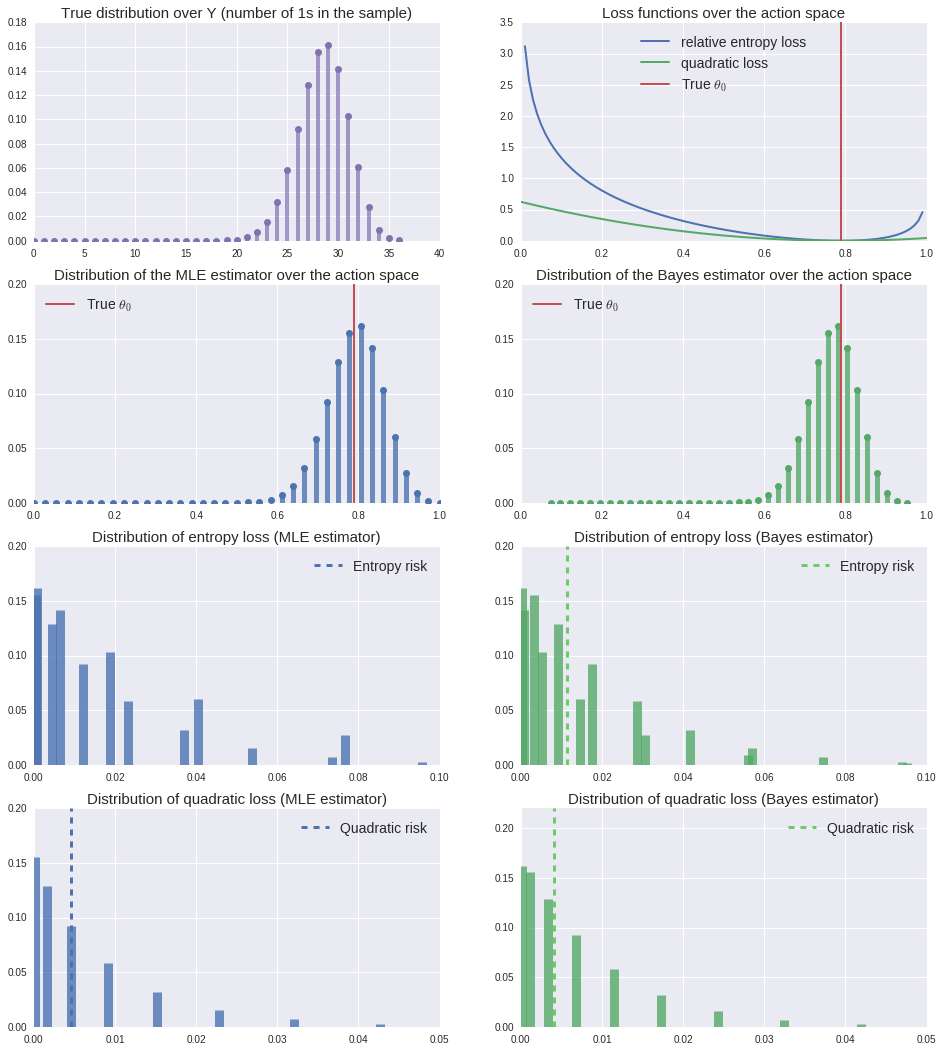

In [6]:
theta0_slider = FloatSlider(min = 0.0, max = 1.0, step = 0.01, value = theta0)
n_slider = FloatSlider(min = 10, max = 100 , step = 1, value = n)

@interact(theta0 = theta0_slider, n = n_slider)
def example1(theta0, n):
    fig, ax = plt.subplots(4, 2, figsize = (16, 18))

    true_dist = stats.binom(n, theta0)
    
    y_grid = np.arange(n + 1)                       # sum of ones in a sample
    a_grid = np.linspace(0, 1, 100)                 # action space represented as [0, 1]
    rel_ent = relative_entropy(theta0, a_grid)      # form of the loss function
    quadratic = quadratic_loss(theta0, a_grid)      # form of the loss function

    # The two decision functions (as a function of Y)
    decision_rule = y_grid/n
    decision_rule_bayes = (y_grid + alpha)/(n + alpha + beta) 

    loss_re_mle = relative_entropy(theta0, decision_rule)
    loss_re_bayes = relative_entropy(theta0, decision_rule_bayes)
    loss_quad_mle = quadratic_loss(theta0, decision_rule)
    loss_quad_bayes = quadratic_loss(theta0, decision_rule_bayes)

    loss_dist_re_mle = np.asarray([loss_distribution(i, decision_rule,
                                                  "relative_entropy",
                                                  true_dist, theta0, y_grid) for i in loss_re_mle[1:-1]])
    loss_dist_re_mle = np.hstack([true_dist.pmf(y_grid[0]), loss_dist_re_mle, true_dist.pmf(y_grid[-1])])
    loss_dist_re_bayes = np.asarray([loss_distribution(i, decision_rule_bayes,
                                                    "relative_entropy",
                                                    true_dist, theta0, y_grid) for i in loss_re_bayes])

    loss_dist_quad_mle = np.asarray([loss_distribution(i, decision_rule,
                                                  "quadratic",
                                                  true_dist, theta0, y_grid) for i in loss_quad_mle])
    loss_dist_quad_bayes = np.asarray([loss_distribution(i, decision_rule_bayes,
                                                    "quadratic",
                                                    true_dist, theta0, y_grid) for i in loss_quad_bayes])
    
    risk_re_mle = loss_re_mle @ loss_dist_re_mle
    risk_re_bayes = loss_re_bayes @ loss_dist_re_bayes

    risk_quad_mle = risk_quadratic(theta0, n)
    risk_quad_bayes = risk_quadratic(theta0, n, alpha, beta)
    
    ax[0, 0].set_title('True distribution over Y (number of 1s in the sample)', fontsize = 15)
    ax[0, 0].plot(y_grid, true_dist.pmf(y_grid), 'o', color = sns.color_palette()[3])
    ax[0, 0].vlines(y_grid, 0, true_dist.pmf(y_grid), lw = 4, color = sns.color_palette()[3], alpha = .7)

    ax[0, 1].set_title('Loss functions over the action space', fontsize = 15)
    ax[0, 1].plot(a_grid, rel_ent, lw = 2, label = 'relative entropy loss')
    ax[0, 1].plot(a_grid, quadratic, lw = 2, label = 'quadratic loss')
    ax[0, 1].axvline(theta0, color = sns.color_palette()[2], lw = 2, label = r'True $\theta_0$')
    ax[0, 1].legend(loc = 'best', fontsize = 14)
    
    ax[1, 0].set_title('Distribution of the MLE estimator over the action space', fontsize = 15)
    ax[1, 0].plot(decision_rule, true_dist.pmf(y_grid), 'o')
    ax[1, 0].vlines(decision_rule, 0, true_dist.pmf(y_grid), lw = 5, alpha = .8, color = sns.color_palette()[0])
    ax[1, 0].axvline(theta0, color = sns.color_palette()[2], lw = 2, label = r'True $\theta_0$')
    ax[1, 0].legend(loc = 'best', fontsize = 14)
    ax[1, 0].set_ylim([0, .2])
    ax[1, 1].set_xlim([0, 1])

    ax[1, 1].set_title('Distribution of the Bayes estimator over the action space', fontsize = 15)
    ax[1, 1].plot(decision_rule_bayes, true_dist.pmf(y_grid), 'o', color = sns.color_palette()[1])
    ax[1, 1].vlines(decision_rule_bayes, 0, true_dist.pmf(y_grid), lw = 5, alpha = .8, 
                    color = sns.color_palette()[1])
    ax[1, 1].axvline(theta0, color = sns.color_palette()[2], lw = 2, label = r'True $\theta_0$')
    ax[1, 1].legend(loc = 'best', fontsize = 14)
    ax[1, 1].set_ylim([0, .2])
    ax[1, 1].set_xlim([0, 1])

    ax[2, 0].set_title('Distribution of entropy loss (MLE estimator)', fontsize = 15)
    ax[2, 0].vlines(loss_re_mle, 0, loss_dist_re_mle, lw = 9, alpha = .8, color = sns.color_palette()[0]) 
    ax[2, 0].axvline(risk_re_mle, lw = 3, linestyle = '--',
                     color = sns.color_palette()[0], label = "Entropy risk")
    ax[2, 0].set_xlim([0, .1])
    ax[2, 0].set_ylim([0, .2])
    ax[2, 0].legend(loc = 'best', fontsize = 14)
    
    ax[2, 1].set_title('Distribution of entropy loss (Bayes estimator)', fontsize = 15)
    ax[2, 1].vlines(loss_re_bayes, 0, loss_dist_re_bayes, lw = 9, alpha = .8, color = sns.color_palette()[1]) 
    ax[2, 1].axvline(risk_re_bayes, lw = 3, linestyle = '--',
                     color = sns.color_palette("muted")[1], label = "Entropy risk")
    ax[2, 1].set_xlim([0, .1])
    ax[2, 1].set_ylim([0, .2])
    ax[2, 1].legend(loc = 'best', fontsize = 14)

    ax[3, 0].set_title('Distribution of quadratic loss (MLE estimator)', fontsize = 15)
    ax[3, 0].vlines(loss_quad_mle, 0, loss_dist_quad_mle, lw = 9, alpha = .8, color = sns.color_palette()[0]) 
    ax[3, 0].axvline(risk_quad_mle, lw = 3, linestyle = '--', 
                     color = sns.color_palette()[0], label = "Quadratic risk")
    ax[3, 0].set_xlim([0, .05])
    ax[3, 0].set_ylim([0, .2])
    ax[3, 0].legend(loc = 'best', fontsize = 14)
    
    ax[3, 1].set_title('Distribution of quadratic loss (Bayes estimator)', fontsize = 15)
    ax[3, 1].vlines(loss_quad_bayes, 0, loss_dist_quad_bayes, lw = 9, alpha = .8, color = sns.color_palette()[1]) 
    ax[3, 1].axvline(risk_quad_bayes, lw = 3, linestyle = '--', 
                     color = sns.color_palette("muted")[1], label = "Quadratic risk")
    ax[3, 1].set_xlim([0, .05])
    ax[3, 1].set_ylim([0, .22])
    ax[3, 1].legend(loc = 'best', fontsize = 14)

    
    plt.show()

##### NOTE: we should break this figure into separate pieces and compare the objects using fixed parameter values (no slider)

### Discussion:

Role of the loss function

* For all sample sizes, the probability mass function of the MLE estimator assigns positive probability to both $\theta=0$ and $\theta = 1$, whereas the support of the Bayes estimator lies always in the interior $(0, 1)$. This difference has significant consequences for the relative entropy risk, because $L_{RE}$ is not defined (or it takes infinity) at the bounaries of $[0, 1]$. As a result, the relative entopy risk of the MLE estimator does not exist and so the Bayes estimator always wins in terms of realative entropy. The secret of $d_{bayes}$ is to shrink the effective action space.

Bias vs. variance

* The MLE estimator is unbiased in the sense that its mean always coincide with the true $\theta_0$. In contrast, the Bayes estimator is biased - the extent of which depends on the relationship between the prior parameters and the true value. Notice, however, that $d_{bayes}$ is less dispered, the values to which it assigns positive probability are more densely placed in $[0, 1]$. Exploiting this trade-off between bias and variance will be a crucial device in finding decision rules with low risk.

Performance of the decision rules depends on the true data generating mechanism

* Comparing the decision rules in terms of the quadratic loss reveals that the true $\theta_0$ is a critical factor. It determines the size of the bias (hence the risk) of the Bayes estimator. Since $\theta_0$ is unknown, this naturally introduces a subjective (not data driven) element into our analysis: when the prior happens to concentrate around the true $\theta_0$ the Bayes estimator performs better thant the MLE, otherwise the bias could be so large that it flips the ordering of decision rules.   


### Example (cont) - induced distributions for linear regression


Take the simple case when the data is i.i.d. and 

* $(Y,X) \sim \mathcal{N}(\mu, \Sigma)$ where 

> * $\mu = (1, 3)$


> * $\Sigma = 
\begin{bmatrix}
    4  & 1 \\
    1 & 8
\end{bmatrix}$

* $n=50$

In this case the optimal regression function is affine (correct specification) and the coefficients are given by

\begin{align}
\beta_0 &= \mu_Y - \rho\frac{\sigma_Y}{\sigma_X}\mu_X = 1 - \frac{1}{8} 3 = -0.625 \\
\beta_1 &= \rho\frac{\sigma_Y}{\sigma_X} = \frac{1}{8} = 0.125
\end{align}

For the Bayes estimator consider

> * the prior mean being $\mu_b = (2, 2)$


> * the precision matrix being $\Lambda_b = 
\begin{bmatrix}
    6  & -3 \\
    -3 & 6
\end{bmatrix}$

With the given specification we can simulate the induced distributions over actions and over losses.

In [2]:
mu = np.array([1, 3])                    # mean
sigma = np.array([[4, 1], [1, 8]])       # covariance matrix
n = 50                                   # sample size

# Bayes priors
mu_bayes = np.array([2, 2])
precis_bayes = np.array([[6, -3], [-3, 6]])

# joint normal rv for (Y,X)
mvnorm = multivariate_normal(mu, sigma)

# decision rule -- OLS estimator
def d_OLS(Z, n):
    Y = Z[:, 0]
    X = np.stack((np.ones(n), Z[:,1]), axis=-1)
    return np.linalg.inv(X.T @ X) @ X.T @ Y

# decision rule -- Bayes
def d_bayes(Z, n):
    Y = Z[:, 0]
    X = np.stack((np.ones(n), Z[:,1]), axis=-1)
    return np.linalg.inv(X.T @ X + precis_bayes) @ (precis_bayes @ mu_bayes + X.T @ Y)

# loss -- define integrand
def loss_int(y, x, b):
    '''Defines the integrand under mvnorm distribution.'''
    return (y - b[0] - b[1]*x)**2*mvnorm.pdf((y,x))

# simulate distribution over actions and over losses
B_OLS = []
L_OLS = []
B_bayes = []
L_bayes = []

for i in range(1000):
    # generate sample
    Z = mvnorm.rvs(n)
    
    # get OLS action corrsponding to realized sample
    b_OLS = d_OLS(Z, n)
    
    # get Bayes action
    b_bayes = d_bayes(Z, n)
    
    # get loss through integration
    l_OLS = dblquad(loss_int, -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf, args=(b_OLS,)) # get loss
    l_bayes = dblquad(loss_int, -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf, args=(b_bayes,)) # get loss
    
    # record action
    B_OLS.append(b_OLS)
    B_bayes.append(b_bayes)
    
    # record loss
    L_OLS.append(l_OLS)
    L_bayes.append(l_bayes)

# take first column if integrating    
L_OLS = np.array(L_OLS)[:, 0]
L_bayes = np.array(L_bayes)[:, 0]


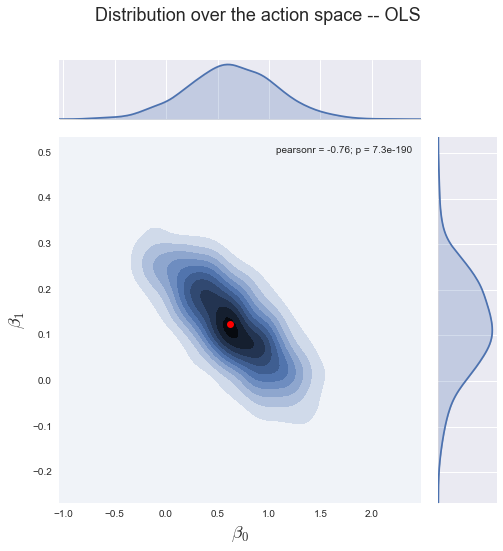

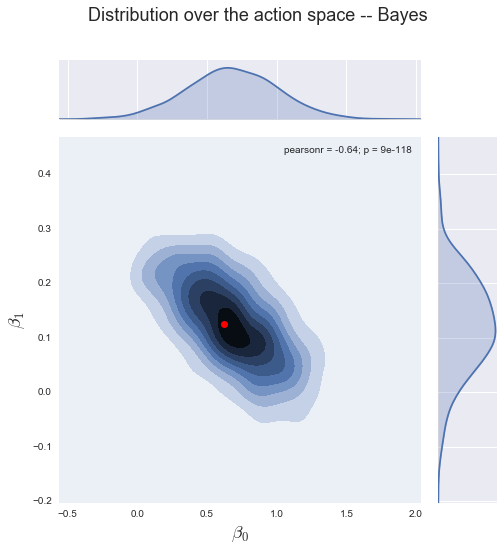

In [3]:
B_OLS = pd.DataFrame(B_OLS, columns=["$\\beta_0$", "$\\beta_1$"])
B_bayes = pd.DataFrame(B_bayes, columns=["$\\beta_0$", "$\\beta_1$"])

g1 = sns.jointplot(x = "$\\beta_0$", y = "$\\beta_1$", data=B_OLS, kind="kde", space=0.3, color = sns.color_palette()[0], size=7, xlim = (-1, 2), ylim = (-.2, .4))
g1.ax_joint.plot([mu[0] - sigma[0,1]/sigma[1,1]*mu[1]],[sigma[0,1]/sigma[1,1]], 'ro', color='r', label='best in class')
g1.set_axis_labels(r'$\beta_0$', r'$\beta_1$', fontsize=18)
g1.fig.suptitle('Distribution over the action space -- OLS', fontsize=18, y=1.08)

g2 = sns.jointplot(x = "$\\beta_0$", y = "$\\beta_1$", data=B_bayes, kind="kde", space=0.3, color = sns.color_palette()[0], size=7, xlim = (-1, 2), ylim = (-.2, .4))
g2.ax_joint.plot([mu[0] - sigma[0,1]/sigma[1,1]*mu[1]],[sigma[0,1]/sigma[1,1]], 'ro', color='r', label='best in class')
g2.set_axis_labels(r'$\beta_0$', r'$\beta_1$', fontsize=18)
g2.fig.suptitle('Distribution over the action space -- Bayes', fontsize=18, y=1.08)
plt.show()


The best in class action in the normal case is the affine function with coefficients $(\beta_0, \beta_1) = (-.625, .125)$. This action is depicted by a red dot on the graphs above. We can compute the corresponding loss -- the minimum loss attainable with the actions in $\mathcal{A}$ -- as follows. 

In [4]:
b_best = [mu[0] - sigma[0,1]/sigma[1,1]*mu[1], sigma[0,1]/sigma[1,1]]
l_best = dblquad(loss_int, -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf, args=(b_best,))
print(l_best[0])


3.8749999999509477


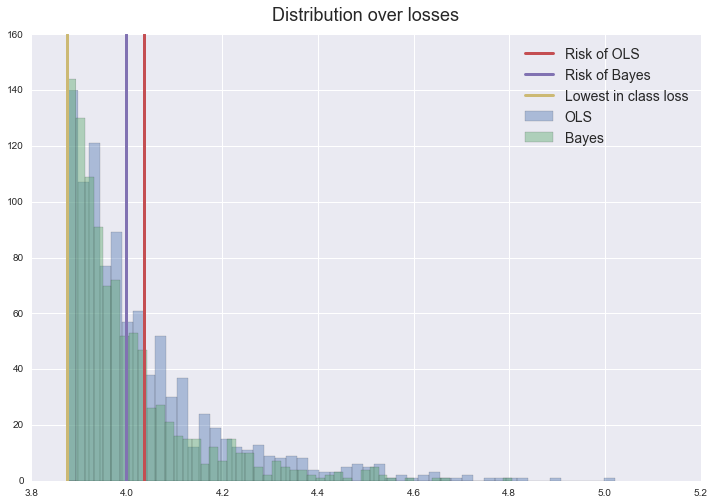

In [5]:
plt.figure(figsize=(12, 8))
sns.distplot(L_OLS, bins=50, kde=False, color = sns.color_palette()[0], label='OLS')
sns.distplot(L_bayes, bins=50, kde=False, color = sns.color_palette()[1], label='Bayes')
plt.axvline(x=L_OLS.mean(), ymin=0, ymax=1, linewidth=3, color = sns.color_palette()[2], label='Risk of OLS')
plt.axvline(x=L_bayes.mean(), ymin=0, ymax=1, linewidth=3, color = sns.color_palette()[3], label='Risk of Bayes')
plt.axvline(x=l_best[0], ymin=0, ymax=1, linewidth=3, color = sns.color_palette()[4], label='Lowest in class loss')
plt.title('Distribution over losses', fontsize = 18, y=1.02)
plt.legend(fontsize=14)
plt.show()


### Discussion

* The joint plots for the distributions over actions illustrate that the Bayes actions have a bigger bias relative to the OLS ones -- in fact we know that the OLS estimates are unbiased. 

In [7]:
beta_0 = mu[0] - sigma[0,1]/sigma[1,1]*mu[1]
beta_1 = sigma[0,1]/sigma[1,1]

print('Bias of OLS')
print('==========================')
print('{:.4f} - {:.4f} = {:.4f}'.format(beta_0, B_OLS.mean()[0], beta_0 - B_OLS.mean()[0]))
print('{:.4f} - {:.4f} = {:.4f}\n\n'.format(beta_1, B_OLS.mean()[1], beta_1 - B_OLS.mean()[1]))

print('Bias of Bayes')
print('==========================')
print('{:.4f} - {:.4f} = {:.4f}'.format(beta_0, B_bayes.mean()[0], beta_0 - B_bayes.mean()[0]))
print('{:.4f} - {:.4f} = {:.4f}'.format(beta_1, B_bayes.mean()[1], beta_1 - B_bayes.mean()[1]))

Bias of OLS
0.6250 - 0.6358 = -0.0108
0.1250 - 0.1223 = 0.0027


Bias of Bayes
0.6250 - 0.6786 = -0.0536
0.1250 - 0.1235 = 0.0015


* On the other hand the Bayes actions have smaller variance relative to the OLS actions.

In [8]:
print('Variance of OLS')
print('======================')
print(B_OLS.var())

print('\n\nVarinace of Bayes')
print('======================')
print(B_bayes.var())

Variance of OLS
$\beta_0$    0.182442
$\beta_1$    0.010429
dtype: float64


Varinace of Bayes
$\beta_0$    0.103671
$\beta_1$    0.007337
dtype: float64


* In terms of the expected loss the slightly bigger bias of the Bayes estimate is more compensated by the lower variance. The risk of the Bayes decision rule is lower than that of the OLS. 

In [29]:
print('Risk of OLS:   {:.4f} \nRisk of Bayes: {:.4f}'.format(L_OLS.mean(), L_bayes.mean()))

Risk of OLS:   4.0338 
Risk of Bayes: 4.0007


* The feature of the true DGP lies within the action space and the model is very "simple", hence it's difficult to beat the OLS (we need small sample and large noise). With more complex models this might not be the case.

# Misspecification and the bias-variance dilemma

In the above examples we maintained the assumption that the true feature of the data generating process (probability mass function of $Z$ or conditional expectation of $Y$ given $X$) lies within the specified action set. In applications hinging on nonexperimental data, however, it is more reasonable to assume that the action set contains only approximations of the true feature. We say that the model is misspecified if the action space does not contain the feature of the true data generating process, i.e., $\gamma(P) \not \in \mathcal{A}$.

Nothing in the analysis above prevents us to entertain the possibility of misspecification. In these instances the best in class action is only an approximation of the true feature. For example, the true regression function might not be linear however the exercise of estimating a linear approximation of the regression function is completely well defined. 

One could measure this approximation error via the loss function without introducing the inference problem. The **approximation error** quantified via the loss is given by

\begin{equation}
\min_{a\in\mathcal{A}} L(P,a) - L(P, \gamma(P)) \quad\quad (2)
\end{equation}

This naturally leads to a dilemma regarding the "size" of the action space. In principle, with a relatively rich $\mathcal{A}$, we can get closer to the truth by making the the difference in (2) small. Recall, however, that we do not know the best-in class action $a^{*}_{L, P, \mathcal{A}}$ either. Although, we will see (in the next notebook) that by requiring the property of *consistency* from our decision rules, we can guarantee to get close to $a^{*}_{L, P, \mathcal{A}}$ at least with a sufficiently large sample, the neccesary sample size will itself depend on the size of $\mathcal{A}$. With a too complex $\mathcal{A}$, the estimation of the best-in class action can be so bad for reasonable sample sizes that misspecification concerns become secondary.  

This trade-off closely resembles the bias-variance dilemma well-known from classical statistics. To see this, decompose the excessive risk of a decision rule $d$ for a given sample size $n$ (relative to the value of loss at the truth) as 

\begin{align*}
R_n(P, d) - L\left(P, \gamma(P) \right) = \underbrace{R_n(P, d) - L\left(P, a^{*}_{L,P, \mathcal{A}}\right)}_{\text{estimation error}} + \underbrace{L\left(P, a^{*}_{L, P, \mathcal{A}}\right)- L\left(P, \gamma(P)\right)}_{\text{approximation error}}
\end{align*}

The **estimation error** stems from the fact that we do not know $P$, so we have to use a finite sample to approximate the best in-class action. The second term, which is not influenced by any random object, is the same quantity as the difference in (2). 

The estimation error can be viewed as the variance, while the approximation error is associated with the bias of the decision rule. One of the ways of balancing the trade-off between bias and variance is through changing the action space $\mathcal{A}$. If $\mathcal{A}$ is "small", then the variance (estimation error) is small, while the bias (approximation error) is large, leading to underfitting. On the other hand, with a rich $\mathcal{A}$, the estimation error might get "too" large, implying overfitting.

#### A warning

The introduced notion of misspecification is a *statistical* one. From a modeler's point of view, a natural question to ask is to what extent misspecification affects the economic interpretation of the parameters of a fitter statistical model. Intuitively, a necessary condition for the economic interpretation is to have a correctly specified statistical model. Because different economic models can give rise to the same statistical model, this condition is by no means sufficient. From this angle, a misspecified statistical model can easily invalidate any kind of economic interpretation of estimated parameters. This issue is more subtle and it would require an extensive treatment that we cannot deliver here, but it is worth keeping in mind the list of very strong assumptions necessary to give well-defined meaning to the parameters that we seek to estimate. An interesting discussion can be found in Chapter 4 of White (1994).

--------------------------------------
### References

Breiman, Leo (1969). Probability and Stochastic Processes: With a View Towards Applications. Houghton Mifflin 

Ferguson, Thomas S. (1967). Mathematical Statistics: A Decision Theoretic Approach. Academic Press

Manski, C. (1994). Analog estimation of econometric models. In: Engle III, R.F.,McFadden, D.F. (Eds.) Handbook of Econometrics, vol. 4. North-Holland, Amsterdam.

White, Halbert (1994), Estimation, Inference and Specification Analysis (Econometric Society Monographs). Cambridge University Press
